In [124]:
import pandas as pd

In [125]:
df = pd.read_pickle('Apk.csv')
df.head()

Class                                         Permission  \
0  Adware  [android.permission.ACCESS_FINE_LOCATION, andr...   
1  Adware  [com.android.launcher.permission.INSTALL_SHORT...   
2  Adware  [android.permission.READ_CONTACTS, android.per...   
3  Adware  [com.android.launcher.permission.INSTALL_SHORT...   
4  Adware  [android.permission.ACCESS_FINE_LOCATION, andr...   

                                                 apk  
0  00325582d7caaf0f36ad333869df444a1aa39326e60745...  
1  00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...  
2  00621e015191863041e78726b863b7e1374b17fda69036...  
3  0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...  
4  018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       2278 non-null   object
 1   Permission  2278 non-null   object
 2   apk         2278 non-null   object
dtypes: object(3)
memory usage: 53.5+ KB


In [127]:
df.isnull().sum()

Class         0
Permission    0
apk           0
dtype: int64

In [128]:
df['Class'].value_counts()

Banking    608
SMS        607
benign     565
Adware     498
Name: Class, dtype: int64

In [129]:
df['apk'].count()

2278

# 展開Permission

In [130]:
df['Permission'][0]

['android.permission.ACCESS_FINE_LOCATION',
 'android.permission.SYSTEM_ALERT_WINDOW',
 'android.permission.GET_TASKS',
 'android.permission.RESTART_PACKAGES',
 'android.permission.VIBRATE',
 'android.permission.ACCESS_WIFI_STATE',
 'android.permission.ACCESS_COARSE_LOCATION',
 'android.permission.ACCESS_NETWORK_STATE',
 'android.permission.READ_PHONE_STATE',
 'android.permission.WRITE_EXTERNAL_STORAGE',
 'android.permission.INTERNET',
 'android.permission.WAKE_LOCK']

In [131]:
df['Permission'][1]

['com.android.launcher.permission.INSTALL_SHORTCUT',
 'android.permission.SYSTEM_ALERT_WINDOW',
 'android.permission.ACCESS_FINE_LOCATION',
 'android.permission.GET_TASKS',
 'android.permission.RESTART_PACKAGES',
 'android.permission.INSTALL_PACKAGES',
 'android.permission.ACCESS_WIFI_STATE',
 'com.android.launcher.permission.UNINSTALL_SHORTCUT',
 'android.permission.ACCESS_COARSE_LOCATION',
 'android.permission.MOUNT_UNMOUNT_FILESYSTEMS',
 'android.permission.READ_SMS',
 'android.permission.ACCESS_NETWORK_STATE',
 'android.permission.READ_PHONE_STATE',
 'android.permission.WRITE_EXTERNAL_STORAGE',
 'android.permission.READ_LOGS',
 'android.permission.INTERNET']

In [132]:
df_ = df.explode('Permission')
df_['Permission'].drop_duplicates(inplace=True)
df_.head()

Class                               Permission  \
0  Adware  android.permission.ACCESS_FINE_LOCATION   
0  Adware   android.permission.SYSTEM_ALERT_WINDOW   
0  Adware             android.permission.GET_TASKS   
0  Adware      android.permission.RESTART_PACKAGES   
0  Adware               android.permission.VIBRATE   

                                                 apk  
0  00325582d7caaf0f36ad333869df444a1aa39326e60745...  
0  00325582d7caaf0f36ad333869df444a1aa39326e60745...  
0  00325582d7caaf0f36ad333869df444a1aa39326e60745...  
0  00325582d7caaf0f36ad333869df444a1aa39326e60745...  
0  00325582d7caaf0f36ad333869df444a1aa39326e60745...

In [133]:
df_['count'] = 1
tmp_df = df_.pivot_table(index=['apk', 'Class'], columns=['Permission'], values='count')

In [134]:
tmp_df = tmp_df.sort_index(axis=1, level=1)
tmp_df = tmp_df.reset_index()

In [135]:
tmp_df

Permission                                                apk    Class  \
0           00325582d7caaf0f36ad333869df444a1aa39326e60745...   Adware   
1           00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...   Adware   
2           00621e015191863041e78726b863b7e1374b17fda69036...   Adware   
3           0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...   Adware   
4           018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...   Adware   
...                                                       ...      ...   
2269        ffeb97d2f85d1e30f10562c003e695f323a10f905f87c0...   benign   
2270        ffecc366e301184bb458e1375d99cd58b6d918d857a108...   benign   
2271        ffecd2343d0d4fe17071180b355e7d30744f74915ede4f...   benign   
2272        fff4c39a07f20e062231781a0d7f2e039f59286d3f5d8d...      SMS   
2273        fff8e36e72ca18a049929c7f2f584f57b6fa2a03dfbe40...  Banking   

Permission  ANDROID.PERMISSION.ACCESS_COARSE_LOCATION  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
2269                                              NaN   
2270                                              NaN   
2271                                              NaN   
2272                                              NaN   
2273                                              NaN   

Permission  ANDROID.PERMISSION.ACCESS_FINE_LOCATION  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
2269                                            NaN   
2270                                            NaN   
2271                                            NaN   
2272                                            NaN   
2273                                            NaN   

Permission  ANDROID.PERMISSION.VIBRATE  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
2269                               NaN   
2270                               NaN   
2271                               NaN   
2272                               NaN   
2273                               NaN   

Permission  adnroid.permission.ACCESS_CHECKIN_PROPERTTES  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
2269                                                 NaN   
2270                                                 NaN   
2271                                                 NaN   
2272                                                 NaN   
2273                                                 NaN   

Permission  ae.gov.mol.permission.C2D_MESSAGE  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
2269                                      NaN   
2270                                      NaN   
2271                                      NaN   
2272                                      NaN   


In [136]:
tmp_df.fillna(0, inplace=True)

In [137]:
tmp_df.head()

Permission                                                apk   Class  \
0           00325582d7caaf0f36ad333869df444a1aa39326e60745...  Adware   
1           00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...  Adware   
2           00621e015191863041e78726b863b7e1374b17fda69036...  Adware   
3           0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...  Adware   
4           018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...  Adware   

Permission  ANDROID.PERMISSION.ACCESS_COARSE_LOCATION  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   

Permission  ANDROID.PERMISSION.ACCESS_FINE_LOCATION  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

Permission  ANDROID.PERMISSION.VIBRATE  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

Permission  adnroid.permission.ACCESS_CHECKIN_PROPERTTES  \
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   

Permission  ae.gov.mol.permission.C2D_MESSAGE  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

Permission  air.br.com.megajogos.mobile.permission.C2D_MESSAGE  \
0                                                         0.0    
1                                                         0.0    
2                                                         0.0    
3                                                         0.0    
4                                                         0.0    

Permission  air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE  \
0                                                         0.0                
1                                                         0.0                
2                                                         0.0                
3                                                         0.0                
4                                                         0.0                

Permission  air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE  ...  \
0                                                         0.0             ...   
1                                                         0.0             ...   
2                                                         0.0             ...   
3                                                         0.0             ...   
4                                                         0.0             ...   

Permission  tv.cinetrailer.mobile.b.permission.C2D_MESSAGE  \
0                                                      0.0   
1                                                      0.0   
2                                                      0.0   
3                                                      0.0   
4                                                      0.0   

Permission  uk.co.avoir.accord.permission.C2D_MESSAGE  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                       

In [138]:
img_df = tmp_df
img_df.head()

Permission                                                apk   Class  \
0           00325582d7caaf0f36ad333869df444a1aa39326e60745...  Adware   
1           00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...  Adware   
2           00621e015191863041e78726b863b7e1374b17fda69036...  Adware   
3           0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...  Adware   
4           018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...  Adware   

Permission  ANDROID.PERMISSION.ACCESS_COARSE_LOCATION  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   

Permission  ANDROID.PERMISSION.ACCESS_FINE_LOCATION  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

Permission  ANDROID.PERMISSION.VIBRATE  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

Permission  adnroid.permission.ACCESS_CHECKIN_PROPERTTES  \
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   

Permission  ae.gov.mol.permission.C2D_MESSAGE  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

Permission  air.br.com.megajogos.mobile.permission.C2D_MESSAGE  \
0                                                         0.0    
1                                                         0.0    
2                                                         0.0    
3                                                         0.0    
4                                                         0.0    

Permission  air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE  \
0                                                         0.0                
1                                                         0.0                
2                                                         0.0                
3                                                         0.0                
4                                                         0.0                

Permission  air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE  ...  \
0                                                         0.0             ...   
1                                                         0.0             ...   
2                                                         0.0             ...   
3                                                         0.0             ...   
4                                                         0.0             ...   

Permission  tv.cinetrailer.mobile.b.permission.C2D_MESSAGE  \
0                                                      0.0   
1                                                      0.0   
2                                                      0.0   
3                                                      0.0   
4                                                      0.0   

Permission  uk.co.avoir.accord.permission.C2D_MESSAGE  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                       

# Permission出現的次數平均

In [139]:
new_df['android.permission.SYSTEM_ALERT_WINDOW'].sum()

554.0

In [140]:
from statistics import mean

In [141]:
permission_cols = new_df.columns.tolist()[2:]
print(len(permission_cols))
permission_count_history = []
for col in permission_cols:
    permission_count_history.append(new_df[col].sum())
len(permission_count_history)

122


122

In [142]:
mean(permission_count_history)

221.95081967213116

# 查看permission

## 每個類別都有出現的permission

In [143]:
class_df = new_df.groupby('Class').sum()
class_df

Permission  android.permission.ACCESS_COARSE_LOCATION  \
Class                                                   
0                                               173.0   
1                                               361.0   

Permission  android.permission.ACCESS_COARSE_UPDATES  \
Class                                                  
0                                                3.0   
1                                               65.0   

Permission  android.permission.ACCESS_DOWNLOAD_MANAGER  \
Class                                                    
0                                                  4.0   
1                                                 15.0   

Permission  android.permission.ACCESS_FINE_LOCATION  \
Class                                                 
0                                             180.0   
1                                             352.0   

Permission  android.permission.ACCESS_LOCATION_EXTRA_COMMANDS  \
Class                                                           
0                                                         8.0   
1                                                        86.0   

Permission  android.permission.ACCESS_MOCK_LOCATION  \
Class                                                 
0                                               5.0   
1                                              28.0   

Permission  android.permission.ACCESS_NETWORK_STATE  \
Class                                                 
0                                             547.0   
1                                            1147.0   

Permission  android.permission.ACCESS_WIFI_STATE  \
Class                                              
0                                          248.0   
1                                          748.0   

Permission  android.permission.ADD_SYSTEM_SERVICE  \
Class                                               
0                                             0.0   
1                                            50.0   

Permission  android.permission.AUTHENTICATE_ACCOUNTS  ...  \
Class                                                 ...   
0                                               36.0  ...   
1                                               37.0  ...   

Permission  com.google.android.providers.gsf.permission.READ_GSERVICES  \
Class                                                                    
0                                                        77.0            
1                                                         3.0            

Permission  com.htc.launcher.permission.READ_SETTINGS  \
Class                                                   
0                                                22.0   
1                                                 7.0   

Permission  com.htc.launcher.permission.UPDATE_SHORTCUT  \
Class                                                     
0                                                  20.0   
1                                                   0.0   

Permission  com.majeur.launcher.permission.UPDATE_BADGE  \
Class                                                     
0                                                  16.0   
1                                                   0.0   

Permission  com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY  \
Class                                                                                       
0                                                        10.0                               
1                                                         0.0                               

Permission  com.sec.android.app.sbrowser.operatorbookmarks.permission.READ_HISTORY_BOOKMARKS  \
Class                                                                                          
0                                                         0.0                                  
1                                                        27.0

In [144]:
adware_permission = class_df.loc['Adware'].gt(0).dot(class_df.columns + ',').split(',')[:-1]
banking_permission = class_df.loc['Banking'].gt(0).dot(class_df.columns + ',').split(',')[:-1]
SMS_permission = class_df.loc['SMS'].gt(0).dot(class_df.columns + ',').split(',')[:-1]
benign_permission = class_df.loc['benign'].gt(0).dot(class_df.columns + ',').split(',')[:-1]

KeyError: 'Adware'

In [145]:
all_have_permission = []
all_have_permission = list(set(adware_permission)&set(banking_permission))
all_have_permission = list(set(all_have_permission)&set(SMS_permission))
all_have_permission = list(set(all_have_permission)&set(benign_permission))
print(len(all_have_permission))

69


# 將Class改成數值，benign為 0， 其餘為1

In [122]:
new_df = tmp_df

In [123]:
new_df['Class'] = new_df['Class'].apply(lambda x : 0 if x=='benign' else 1)
new_df.head()

KeyError: 'Class'

In [108]:
new_df.groupby('Class').sum()

Permission  ANDROID.PERMISSION.ACCESS_COARSE_LOCATION  \
Class                                                   
0                                                 1.0   
1                                                 0.0   

Permission  ANDROID.PERMISSION.ACCESS_FINE_LOCATION  \
Class                                                 
0                                               1.0   
1                                               0.0   

Permission  ANDROID.PERMISSION.VIBRATE  \
Class                                    
0                                  1.0   
1                                  0.0   

Permission  adnroid.permission.ACCESS_CHECKIN_PROPERTTES  \
Class                                                      
0                                                    0.0   
1                                                    1.0   

Permission  ae.gov.mol.permission.C2D_MESSAGE  \
Class                                           
0                                         1.0   
1                                         0.0   

Permission  air.br.com.megajogos.mobile.permission.C2D_MESSAGE  \
Class                                                            
0                                                         1.0    
1                                                         0.0    

Permission  air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE  \
Class                                                                        
0                                                         1.0                
1                                                         0.0                

Permission  air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE  \
Class                                                                      
0                                                         1.0              
1                                                         0.0              

Permission  androd.permission.INSTALL_PACKAGES  \
Class                                            
0                                          0.0   
1                                          1.0   

Permission  android.Manifest.permission.DEVICE_POWER  ...  \
Class                                                 ...   
0                                                0.0  ...   
1                                                1.0  ...   

Permission  tv.cinetrailer.mobile.b.permission.C2D_MESSAGE  \
Class                                                        
0                                                      1.0   
1                                                      0.0   

Permission  uk.co.avoir.accord.permission.C2D_MESSAGE  \
Class                                                   
0                                                 1.0   
1                                                 0.0   

Permission  uk.co.wikiapps.standalone.OFFLINE_SUGGESTION  \
Class                                                      
0                                                    1.0   
1                                                    0.0   

Permission  update.whatsapp.actualizar.whatsapp.news.permission.C2D_MESSAGE  \
Class                                                                         
0                                                         1.0                 
1                                                         0.0                 

Permission  us.zoom.videomeetings.permission.C2D_MESSAGE  \
Class                                                      
0                                                    1.0   
1                                                    0.0   

Permission  us.zoom.videomeetings.permission.KUBI_MESSAGE  \
Class                                                       
0                                                     1.0   
1                                                     0.0   

Permission  va.news.thepopeapp.permission.C2D_MESSAGE  \
Class                              

<AxesSubplot:ylabel='Class'>

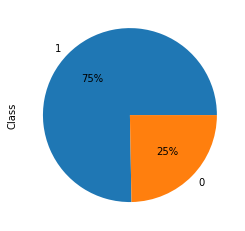

In [109]:
new_df['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# 去除出現次數小於5的permission欄位

In [110]:
len(class_df.columns.to_list())

123

In [111]:
class_df = new_df.groupby('Class').sum()
delete_permission = []
for col in class_df.columns:
    if class_df[col].sum() < 10:
        delete_permission.append(col)
len(delete_permission)

755

In [112]:
new_df.drop(delete_permission, axis=1, inplace=True)
new_df.groupby('Class').sum()

Permission  android.permission.ACCESS_COARSE_LOCATION  \
Class                                                   
0                                               173.0   
1                                               361.0   

Permission  android.permission.ACCESS_COARSE_UPDATES  \
Class                                                  
0                                                3.0   
1                                               65.0   

Permission  android.permission.ACCESS_DOWNLOAD_MANAGER  \
Class                                                    
0                                                  4.0   
1                                                 15.0   

Permission  android.permission.ACCESS_FINE_LOCATION  \
Class                                                 
0                                             180.0   
1                                             352.0   

Permission  android.permission.ACCESS_LOCATION_EXTRA_COMMANDS  \
Class                                                           
0                                                         8.0   
1                                                        86.0   

Permission  android.permission.ACCESS_MOCK_LOCATION  \
Class                                                 
0                                               5.0   
1                                              28.0   

Permission  android.permission.ACCESS_NETWORK_STATE  \
Class                                                 
0                                             547.0   
1                                            1147.0   

Permission  android.permission.ACCESS_WIFI_STATE  \
Class                                              
0                                          248.0   
1                                          748.0   

Permission  android.permission.ADD_SYSTEM_SERVICE  \
Class                                               
0                                             0.0   
1                                            50.0   

Permission  android.permission.AUTHENTICATE_ACCOUNTS  ...  \
Class                                                 ...   
0                                               36.0  ...   
1                                               37.0  ...   

Permission  com.google.android.providers.gsf.permission.READ_GSERVICES  \
Class                                                                    
0                                                        77.0            
1                                                         3.0            

Permission  com.htc.launcher.permission.READ_SETTINGS  \
Class                                                   
0                                                22.0   
1                                                 7.0   

Permission  com.htc.launcher.permission.UPDATE_SHORTCUT  \
Class                                                     
0                                                  20.0   
1                                                   0.0   

Permission  com.majeur.launcher.permission.UPDATE_BADGE  \
Class                                                     
0                                                  16.0   
1                                                   0.0   

Permission  com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY  \
Class                                                                                       
0                                                        10.0                               
1                                                         0.0                               

Permission  com.sec.android.app.sbrowser.operatorbookmarks.permission.READ_HISTORY_BOOKMARKS  \
Class                                                                                          
0                                                         0.0                                  
1                                                        27.0

In [113]:
cols = new_df.columns.to_list()[2:]

In [114]:
new_df['sum'] = new_df.sum(axis=1, numeric_only=True)
new_df.loc[new_df['sum']==0]

Empty DataFrame
Columns: [apk, Class, android.permission.ACCESS_COARSE_LOCATION, android.permission.ACCESS_COARSE_UPDATES, android.permission.ACCESS_DOWNLOAD_MANAGER, android.permission.ACCESS_FINE_LOCATION, android.permission.ACCESS_LOCATION_EXTRA_COMMANDS, android.permission.ACCESS_MOCK_LOCATION, android.permission.ACCESS_NETWORK_STATE, android.permission.ACCESS_WIFI_STATE, android.permission.ADD_SYSTEM_SERVICE, android.permission.AUTHENTICATE_ACCOUNTS, android.permission.BATTERY_STATS, android.permission.BIND_ACCESSIBILITY_SERVICE, android.permission.BLUETOOTH, android.permission.BLUETOOTH_ADMIN, android.permission.BROADCAST_PACKAGE_ADDED, android.permission.BROADCAST_PACKAGE_INSTALL, android.permission.BROADCAST_PACKAGE_REPLACED, android.permission.BROADCAST_SMS, android.permission.BROADCAST_STICKY, android.permission.BROADCAST_WAP_PUSH, android.permission.CALL_PHONE, android.permission.CALL_PRIVILEGED, android.permission.CAMERA, android.permission.CAPTURE_AUDIO_OUTPUT, android.permission.CHANGE_COMPONENT_ENABLED_STATE, android.permission.CHANGE_CONFIGURATION, android.permission.CHANGE_NETWORK_STATE, android.permission.CHANGE_WIFI_MULTICAST_STATE, android.permission.CHANGE_WIFI_STATE, android.permission.CLEAR_APP_CACHE, android.permission.DELETE_PACKAGES, android.permission.DEVICE_POWER, android.permission.DISABLE_KEYGUARD, android.permission.DOWNLOAD_WITHOUT_NOTIFICATION, android.permission.EXPAND_STATUS_BAR, android.permission.FLASHLIGHT, android.permission.GET_ACCOUNTS, android.permission.GET_PACKAGE_SIZE, android.permission.GET_TASKS, android.permission.INSTALL_PACKAGES, android.permission.INTERACT_ACROSS_USERS_FULL, android.permission.INTERNAL_SYSTEM_WINDOW, android.permission.INTERNET, android.permission.KILL_BACKGROUND_PROCESSES, android.permission.MANAGE_ACCOUNTS, android.permission.MODIFY_AUDIO_SETTINGS, android.permission.MODIFY_PHONE_STATE, android.permission.MOUNT_FORMAT_FILESYSTEMS, android.permission.MOUNT_UNMOUNT_FILESYSTEMS, android.permission.NFC, android.permission.PACKAGE_USAGE_STATS, android.permission.PERSISTENT_ACTIVITY, android.permission.PROCESS_INCOMING_CALLS, android.permission.PROCESS_OUTGOING_CALLS, android.permission.READ_CALENDAR, android.permission.READ_CALL_LOG, android.permission.READ_CONTACTS, android.permission.READ_EXTERNAL_STORAGE, android.permission.READ_LOGS, android.permission.READ_PHONE_STATE, android.permission.READ_PROFILE, android.permission.READ_SETTINGS, android.permission.READ_SMS, android.permission.READ_SYNC_SETTINGS, android.permission.READ_SYNC_STATS, android.permission.READ_USER_DICTIONARY, android.permission.RECEIVE_BOOT_COMPLETED, android.permission.RECEIVE_MMS, android.permission.RECEIVE_SMS, android.permission.RECEIVE_USER_PRESENT, android.permission.RECEIVE_WAP_PUSH, android.permission.RECORD_AUDIO, android.permission.REORDER_TASKS, android.permission.RESTART_PACKAGES, android.permission.SEND_SMS, android.permission.SET_DEBUG_APP, android.permission.SET_WALLPAPER, android.permission.SET_WALLPAPER_HINTS, android.permission.STATUS_BAR, android.permission.SUBSCRIBED_FEEDS_READ, android.permission.SYSTEM_ALERT_WINDOW, android.permission.SYSTEM_OVERLAY_WINDOW, android.permission.UPDATE_APP_OPS_STATS, android.permission.UPDATE_DEVICE_STATS, android.permission.USES_POLICY_FORCE_LOCK, android.permission.USE_CREDENTIALS, android.permission.USE_FINGERPRINT, android.permission.USE_SIP, android.permission.VIBRATE, android.permission.WAKE_LOCK, android.permission.WRITE_APN_SETTINGS, android.permission.WRITE_CALENDAR, android.permission.WRITE_CALL_LOG, android.permission.WRITE_CONTACTS, android.permission.WRITE_EXTERNAL_STORAGE, android.permission.WRITE_INTERNAL_STORAGE, android.permission.WRITE_SECURE, android.permission.WRITE_SECURE_SETTINGS, ...]
Index: []

[0 rows x 126 columns]

In [115]:
new_df.drop(['sum'], axis=1, inplace=True)

In [116]:
new_df['apk']

0       00325582d7caaf0f36ad333869df444a1aa39326e60745...
1       00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...
2       00621e015191863041e78726b863b7e1374b17fda69036...
3       0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...
4       018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...
                              ...                        
2269    ffeb97d2f85d1e30f10562c003e695f323a10f905f87c0...
2270    ffecc366e301184bb458e1375d99cd58b6d918d857a108...
2271    ffecd2343d0d4fe17071180b355e7d30744f74915ede4f...
2272    fff4c39a07f20e062231781a0d7f2e039f59286d3f5d8d...
2273    fff8e36e72ca18a049929c7f2f584f57b6fa2a03dfbe40...
Name: apk, Length: 2274, dtype: object

# 儲存處理好的資料

In [117]:
new_df.set_index('Class', inplace=True)

In [118]:
new_df.to_csv('ECT_HW8_107403020.csv')

In [119]:
df = pd.read_csv('ECT_HW8_107403020.csv')
df.head()

Class                                                apk  \
0      1  00325582d7caaf0f36ad333869df444a1aa39326e60745...   
1      1  00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...   
2      1  00621e015191863041e78726b863b7e1374b17fda69036...   
3      1  0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...   
4      1  018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...   

   android.permission.ACCESS_COARSE_LOCATION  \
0                                        1.0   
1                                        1.0   
2                                        1.0   
3                                        1.0   
4                                        1.0   

   android.permission.ACCESS_COARSE_UPDATES  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   android.permission.ACCESS_DOWNLOAD_MANAGER  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   android.permission.ACCESS_FINE_LOCATION  \
0                                      1.0   
1                                      1.0   
2                                      0.0   
3                                      1.0   
4                                      1.0   

   android.permission.ACCESS_LOCATION_EXTRA_COMMANDS  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   android.permission.ACCESS_MOCK_LOCATION  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   android.permission.ACCESS_NETWORK_STATE  \
0                                      1.0   
1                                      1.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   android.permission.ACCESS_WIFI_STATE  ...  \
0                                   1.0  ...   
1                                   1.0  ...   
2                                   1.0  ...   
3                                   1.0  ...   
4                                   1.0  ...   

   com.google.android.providers.gsf.permission.READ_GSERVICES  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   com.htc.launcher.permission.READ_SETTINGS  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   com.htc.launcher.permission.UPDATE_SHORTCUT  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   com.majeur.launcher.permission.UPDATE_BADGE  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   com.samsung.and

# APK轉圖片

In [120]:
import os
import numpy as np
from PIL import Image

In [121]:
img_df

Permission                                                apk  \
Class                                                           
1           00325582d7caaf0f36ad333869df444a1aa39326e60745...   
1           00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...   
1           00621e015191863041e78726b863b7e1374b17fda69036...   
1           0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...   
1           018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...   
...                                                       ...   
0           ffeb97d2f85d1e30f10562c003e695f323a10f905f87c0...   
0           ffecc366e301184bb458e1375d99cd58b6d918d857a108...   
0           ffecd2343d0d4fe17071180b355e7d30744f74915ede4f...   
1           fff4c39a07f20e062231781a0d7f2e039f59286d3f5d8d...   
1           fff8e36e72ca18a049929c7f2f584f57b6fa2a03dfbe40...   

Permission  android.permission.ACCESS_COARSE_LOCATION  \
Class                                                   
1                                                 1.0   
1                                                 1.0   
1                                                 1.0   
1                                                 1.0   
1                                                 1.0   
...                                               ...   
0                                                 0.0   
0                                                 0.0   
0                                                 0.0   
1                                                 1.0   
1                                                 0.0   

Permission  android.permission.ACCESS_COARSE_UPDATES  \
Class                                                  
1                                                0.0   
1                                                0.0   
1                                                0.0   
1                                                0.0   
1                                                0.0   
...                                              ...   
0                                                0.0   
0                                                0.0   
0                                                0.0   
1                                                0.0   
1                                                0.0   

Permission  android.permission.ACCESS_DOWNLOAD_MANAGER  \
Class                                                    
1                                                  0.0   
1                                                  0.0   
1                                                  0.0   
1                                                  0.0   
1                                                  0.0   
...                                                ...   
0                                                  0.0   
0                                                  0.0   
0                                                  0.0   
1                                                  0.0   
1                                                  0.0   

Permission  android.permission.ACCESS_FINE_LOCATION  \
Class                                                 
1                                               1.0   
1                                               1.0   
1                                               0.0   
1                                               1.0   
1                                               1.0   
...                                             ...   
0                                               0.0   
0                                               0.0   
0                                               0.0   
1                                               1.0   
1                                               0.0   

Permission  android.permission.ACCESS_LOCATION_EXTRA_COMMANDS  \
Class                                                           
1                                                         0.0   
1                

In [41]:
df = img_df
df.head()

Permission  Class                                                apk  \
0               1  00325582d7caaf0f36ad333869df444a1aa39326e60745...   
1               1  00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...   
2               1  00621e015191863041e78726b863b7e1374b17fda69036...   
3               1  0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...   
4               1  018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...   

Permission  android.permission.ACCESS_COARSE_LOCATION  \
0                                                 1.0   
1                                                 1.0   
2                                                 1.0   
3                                                 1.0   
4                                                 1.0   

Permission  android.permission.ACCESS_COARSE_UPDATES  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

Permission  android.permission.ACCESS_DOWNLOAD_MANAGER  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   

Permission  android.permission.ACCESS_FINE_LOCATION  \
0                                               1.0   
1                                               1.0   
2                                               0.0   
3                                               1.0   
4                                               1.0   

Permission  android.permission.ACCESS_LOCATION_EXTRA_COMMANDS  \
0                                                         0.0   
1                                                         0.0   
2                                                         0.0   
3                                                         0.0   
4                                                         0.0   

Permission  android.permission.ACCESS_MOCK_LOCATION  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

Permission  android.permission.ACCESS_NETWORK_STATE  \
0                                               1.0   
1                                               1.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   

Permission  android.permission.ACCESS_WIFI_STATE  ...  \
0                                            1.0  ...   
1                                            1.0  ...   
2                                            1.0  ...   
3                                            1.0  ...   
4                                            1.0  ...   

Permission  com.google.android.providers.gsf.permission.READ_GSERVICES  \
0                                                         0.0            
1                                                         0.0            
2                                                         0.0            
3                                                         0.0            
4                                                         0.0            

Permission  com.htc.launcher.permission.READ_SETTINGS  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   

Permission  com.htc.lau

In [42]:
df.reset_index('Class', inplace=True)

KeyError: 'Requested level (Class) does not match index name (None)'

In [292]:
permissioin_array = df.drop(['Class', 'apk'], axis=1).to_numpy()
len(permissioin_array[0])

123

In [293]:
apk_2D = permissioin_array[0].reshape(2, 439)
apk_2D = np.where(apk_2D > 0.5, 255, 0)
img = Image.fromarray(apk_2D)
img

ValueError: cannot reshape array of size 123 into shape (2,439)

In [242]:
def apk_to_img(apk, file_name):
    apk = apk.reshape(2, 439)
    apk = np.where(apk==1, 255, 0)
    img = Image.fromarray(apk_2D, 'L')    
    file_name = 'apk_img/' + file_name 
    img.save(file_name)

In [245]:
for i in range(len(permissioin_array)):
    print(permissioin_array[i])
#     file = 'permision'+str(i)+'.png'
#     apk_to_img(apk, file)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan  1.  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan  1. nan  1. nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan  1.  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan  1. nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan  1. nan  1. nan  1. nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan  1. nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan  1. nan  1. nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan  1. nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan  1. nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan  1.  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan  1.
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan  1. nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan  1.  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan  1. nan nan  1. nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1.  1. nan nan nan nan
  1. nan nan nan nan  1.  1. nan  1. nan nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan  1.  1.  1. nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan  1. nan nan  1. nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
  1.  1. nan  1. nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan  1. nan nan nan  1. nan nan nan nan  1.
 nan nan  1.  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan  1. nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan  1. nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan  1. nan  1.  1. nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan  1. nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan  1. nan  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
  1.  1. nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan  1.  1. nan nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan  1. nan  1. nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan  1.  1. nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan  1.  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan  1.  1. nan nan nan nan  1. nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan  1.  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan  1. nan  1.
 nan  1. nan nan nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan  1. nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan  1.  1. nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan  1.  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
  1.  1. nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan  1.  1.  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
  1.  1. nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan  1.  1.  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan  1.  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan  1.  1. nan nan nan nan  1. nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan  1.  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan  1. nan  1.
 nan  1. nan nan nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan  1. nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan
 nan nan nan nan  1. nan nan nan nan nan nan  1.  1. nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan  1. nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan  1.  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan  1. nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
  1.  1. nan  1. nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan  1.  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1.  1.  1. nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan  1. nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan  1.  1. nan nan nan nan  1. nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan  1.  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan  1. nan  1.
 nan  1. nan nan nan nan nan nan  1. nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan
 nan  1. nan  1.  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan  1. nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.  1.
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan nan
 nan nan nan nan  1.  1. nan nan nan nan  1.  1.  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan  1.  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan  1. nan nan  1.  1.
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan  1. nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan  1. nan nan  1. nan nan  1. nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan  1.  1.  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan  1. nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan  1. nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan nan
 nan nan nan nan  1.  1. nan nan nan nan  1.  1.  1. nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan  1. nan  1. nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan nan nan nan nan
 nan  1. nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan  1. nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1.  1. nan nan nan nan nan nan  1. nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan  1. nan  1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan
 nan nan nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan  1.
 nan  1. nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan  1. nan nan nan nan  1. nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan  1. nan
 nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan  1. nan nan nan  1. nan nan nan nan nan nan  1. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [52]:
# def apk_to_img(apk, file_name):
#     apk_list = list(apk[:64]+apk[65:])
#     apk_2D = np.array(apk_list)
#     apk_2D = [[0 for x in range(100)] for y in range(1)]
        
#     for i, char in enumerate(apk_list):
#         n = 0
#         if char in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']:
#             n = ord(char) - 48
#         else:
#             n = ord(char) - 87
#         apk_2D[i//100][i%100] = n * 255 // 15

#     apk_2D = np.array(apk_2D)
#     img = Image.fromarray(apk_2D, 'L')
#     file_name = 'apk_img/' + file_name 
#     img.save(file_name)

# for i, apk in enumerate(df['apk']):
#     file = 'permision'+str(i)+'.png'
#     apk_to_img(apk, file)

In [48]:
# apk_list = list(apk[:64]+apk[65:])
# apk_2D = np.array(apk_list)
# apk_2D = [[0 for x in range(100)] for y in range(1)]
        
# for i, char in enumerate(apk_list):
#     n = 0
#     if char in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']:
#         n = ord(char) - 48
#     else:
#         n = ord(char) - 87 
#     apk_2D[i//100][i%100] =  n * 255 // 15
# apk_2D = np.array(apk_2D)
# img = Image.fromarray(apk_2D)
# img

In [87]:
for i in range(len(df)):
    file_name = 'permision' + str(i) + '.png'
    df['apk'].loc[i] = file_name

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
new_df = df[['Class', 'apk']]
new_df

Class                apk
0         1     permision0.png
1         1     permision1.png
2         1     permision2.png
3         1     permision3.png
4         1     permision4.png
...     ...                ...
2269      0  permision2269.png
2270      0  permision2270.png
2271      0  permision2271.png
2272      1  permision2272.png
2273      1  permision2273.png

[2274 rows x 2 columns]

In [89]:
new_df.set_index('Class', inplace=True)
new_df.to_csv('ECT_HW8_107403020_CNN.csv')

# PCA

In [166]:
from sklearn.decomposition import PCA

In [169]:
X = df.drop(['Class', 'apk'], axis=1)
X.head()

android.permission.ACCESS_COARSE_LOCATION  \
0                                        1.0   
1                                        1.0   
2                                        1.0   
3                                        1.0   
4                                        1.0   

   android.permission.ACCESS_COARSE_UPDATES  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   android.permission.ACCESS_DOWNLOAD_MANAGER  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   android.permission.ACCESS_FINE_LOCATION  \
0                                      1.0   
1                                      1.0   
2                                      0.0   
3                                      1.0   
4                                      1.0   

   android.permission.ACCESS_LOCATION_EXTRA_COMMANDS  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   android.permission.ACCESS_MOCK_LOCATION  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   android.permission.ACCESS_NETWORK_STATE  \
0                                      1.0   
1                                      1.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   android.permission.ACCESS_WIFI_STATE  \
0                                   1.0   
1                                   1.0   
2                                   1.0   
3                                   1.0   
4                                   1.0   

   android.permission.ADD_SYSTEM_SERVICE  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   android.permission.AUTHENTICATE_ACCOUNTS  ...  \
0                                       0.0  ...   
1                                       0.0  ...   
2                                       0.0  ...   
3                                       0.0  ...   
4                                       0.0  ...   

   com.google.android.providers.gsf.permission.READ_GSERVICES  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   com.htc.launcher.permission.READ_SETTINGS  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   com.htc.launcher.permission.UPDATE_SHORTCUT  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   com.majeur.launcher.permission.UPDATE_BADGE  \
0                                          0.0   
1                                          0.0   


In [170]:
pca = PCA(n_components=0.98)
pca.fit(X)
pca_X = pca.transform(X)
pca_df = pd.DataFrame(pca_X)

In [172]:
new_df = pd.concat([df[['Class', 'apk']], pca_df], axis=1)
new_df.head()

Class                                                apk         0  \
0      1  00325582d7caaf0f36ad333869df444a1aa39326e60745...  0.174208   
1      1  00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...  0.424217   
2      1  00621e015191863041e78726b863b7e1374b17fda69036...  0.728542   
3      1  0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...  0.508729   
4      1  018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d... -0.703182   

          1         2         3         4         5         6         7  ...  \
0  1.498198 -0.243869  0.188511  0.422074  0.504439 -0.621428 -0.138752  ...   
1  1.051660 -1.050975  1.045430  0.770214  0.347622 -0.462709  0.582421  ...   
2  0.440427 -0.829352  0.119782 -0.446660 -0.419057 -0.848029  0.312258  ...   
3  1.493636 -0.579449  0.523808  0.795053  0.721934 -0.400956  0.380284  ...   
4  0.976147 -0.605087  0.641450 -0.058846 -0.108981 -0.455218  0.028319  ...   

         63        64        65        66        67        68        69  \
0 -0.005173  0.052519 -0.012869  0.025401  0.011218 -0.010631  0.022591   
1  0.037823 -0.111190 -0.302160 -0.224017 -0.037210 -0.163164 -0.065152   
2  0.033530 -0.044037 -0.016223 -0.161652  0.118849 -0.124252 -0.125443   
3 -0.012535  0.085352 -0.034588  0.051169  0.064052  0.030339  0.122036   
4  0.022075 -0.011071 -0.054841 -0.027439 -0.035897  0.034520  0.022141   

         70        71        72  
0  0.015115 -0.010152  0.007816  
1 -0.065638  0.095201 -0.100016  
2 -0.008056  0.037067 -0.036901  
3 -0.033365 -0.001880 -0.065079  
4 -0.006092  0.015465  0.005558  

[5 rows x 75 columns]

In [175]:
new_df.set_index('Class', inplace=True)

# 儲存處理好的資料

In [176]:
new_df.to_csv('ECT_HW8_pca_107403020.csv')